 Stufe 1
 Schaue den Code von Jake van der Plas an und versuche ihn zu verstehen.
 [1]-[9] intensiv
 [11]-[15] den Aufruf von SVC mit den Parametern, die Bilder, aber nicht die Plot-Funktionen
 [16]-[17] intensiv
 [22] als Beispiel für automatisiertes Parameter testen

 Importiere svm
 Lade den Iris-Datensatz (mit load_iris) und versuche Iris-Setosa von allen mit Hilfe der allgemeinen Klasse SVC von anderen Iris-Spezies zu trennen.
 Versuche das gleiche mit den anderen Iris-Klassen

 Stufe2
 spiele mit den Parametern kernel, C und evtl. Gamma, decision_function_shape
 Benutze den die score-Funktion aus SVC, um den Erfolg auf den Trainingsdaten zu messen.
 Welche Parameter sind die besten?
 Teste die anderen  svm-Klassen.
 Ist LinearSVC wirklich schneller als der StandardSVC?
 Teste die Parameter mittels GridSearch

 Stufe 3
 das gleiche für das Beispiel mit den 2 Monden.

 # From van der Plas (Python Data Science Handbook): In-Depth: Support Vector Machines

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# use Seaborn plotting defaults
import seaborn as sns; sns.set()


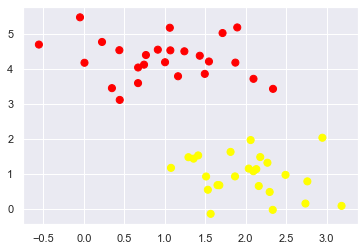

In [2]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');


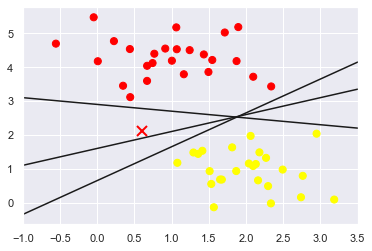

In [3]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)
for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')
plt.xlim(-1, 3.5);


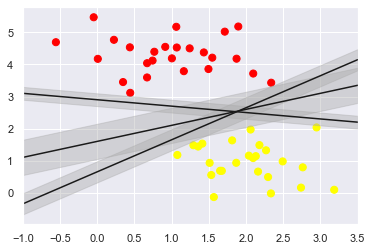

In [4]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', color='#AAAAAA', alpha=0.4)
plt.xlim(-1, 3.5);


In [5]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)


SVC(C=10000000000.0, kernel='linear')

In [6]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a two-dimensional SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none', edgecolor='black')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)


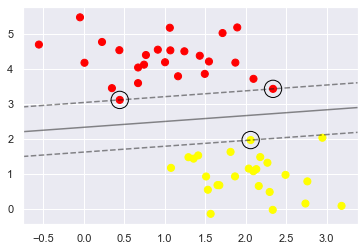

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);


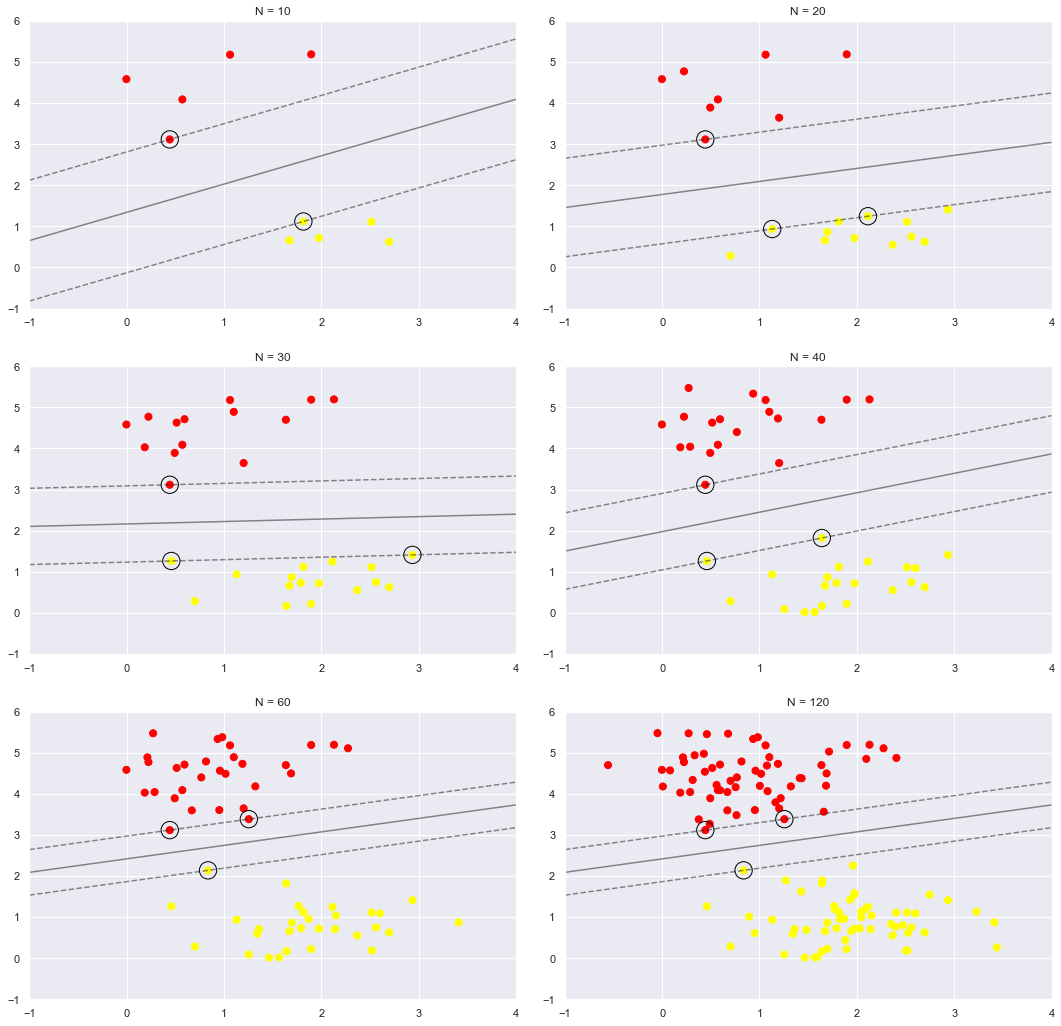

In [8]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2, random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)


N_list = [10, 20, 30, 40, 60, 120]
fig, axes = plt.subplots(3, 2, figsize=(16, 18))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(axes.ravel(), N_list):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))


In [9]:
from ipywidgets import interact, fixed
interact(plot_svm, N=N_list, ax=fixed(None));


interactive(children=(Dropdown(description='N', options=(10, 20, 30, 40, 60, 120), value=10), Output()), _dom_…

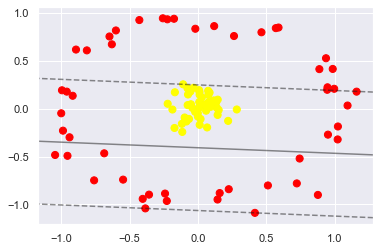

In [10]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)
clf = SVC(kernel='linear').fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False)


In [11]:
r = np.exp(-(X ** 2).sum(axis=1))


In [12]:
from mpl_toolkits import mplot3d
def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=(-90, 90), azim=(-180, 180), X=fixed(X), y=fixed(y));


interactive(children=(IntSlider(value=30, description='elev', max=90, min=-90), IntSlider(value=30, descriptio…

In [13]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)


SVC(C=1000000.0)

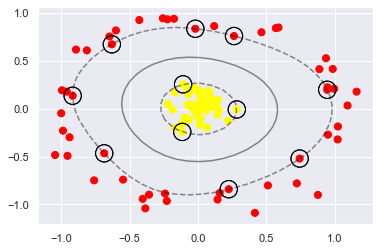

In [14]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=300, lw=1,
            facecolors='none', edgecolors='black')


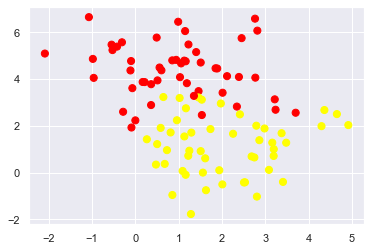

In [15]:
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')


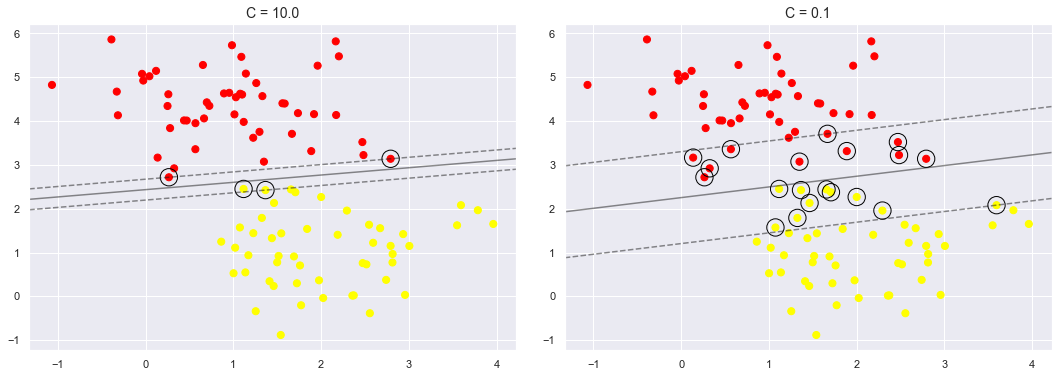

In [16]:
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.8)
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, lw=1, facecolors='none')
    axi.set_title('C = {0:.1f}'.format(C), size=14)


In [17]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)


['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


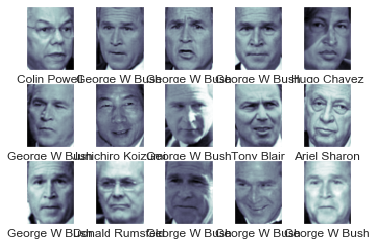

In [18]:
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])


In [19]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pca = PCA(n_components=150, svd_solver='randomized', whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)


In [20]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=42)


In [21]:
from sklearn.model_selection import train_test_split, GridSearchCV
from time import perf_counter
param_grid = {'svc__C': [1, 5, 10, 50], 'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)
start = perf_counter()
grid.fit(Xtrain, ytrain)
end = perf_counter()
print(f'Elapsed time: {end - start:.3g}s')
print(grid.best_params_)


Elapsed time: 32.2s
{'svc__C': 10, 'svc__gamma': 0.001}


In [22]:
model = grid.best_estimator_
yfit = model.predict(Xtest)


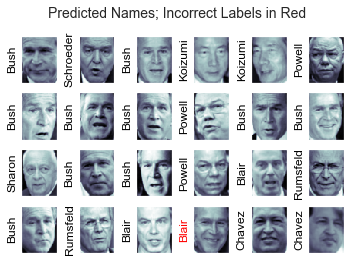

In [23]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1], color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);


In [24]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit, target_names=faces.target_names))


                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.73      0.69        15
     Colin Powell       0.80      0.87      0.83        68
  Donald Rumsfeld       0.74      0.84      0.79        31
    George W Bush       0.92      0.83      0.88       126
Gerhard Schroeder       0.86      0.83      0.84        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.92      1.00      0.96        12
       Tony Blair       0.85      0.95      0.90        42

         accuracy                           0.85       337
        macro avg       0.83      0.84      0.84       337
     weighted avg       0.86      0.85      0.85       337



Text(89.18, 0.5, 'predicted label')

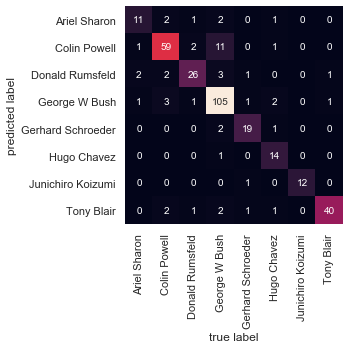

In [25]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
xticklabels=faces.target_names,
yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')



 # Iris Dataset:
 Importiere svm
 Lade den Iris-Datensatz (mit load_iris) und versuche Iris-Setosa von allen mit Hilfe der allgemeinen Klasse SVC von anderen Iris-Spezies zu trennen.
 Versuche das gleiche mit den anderen Iris-Klassen

 Stufe2
 spiele mit den Parametern kernel, C und evtl. Gamma, decision_function_shape
 Benutze den die score-Funktion aus SVC, um den Erfolg auf den Trainingsdaten zu messen.
 Welche Parameter sind die besten?
 Teste die anderen  svm-Klassen.
 Ist LinearSVC wirklich schneller als der StandardSVC?
 Teste die Parameter mittels GridSearch

 Stufe 3
 das gleiche für das Beispiel mit den 2 Monden.

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a two-dimensional SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    print(xlim, ylim)
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    xx, yy = np.meshgrid(x, y)
    xy = np.vstack([xx.ravel(), yy.ravel()]).T
    P = model.decision_function(xy).reshape(xx.shape)
    # plot decision boundary and margins
    ax.contour(xx, yy, P, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none', edgecolor='black')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)


print(load_iris()['DESCR'])
X, y = load_iris(return_X_y=True)


.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

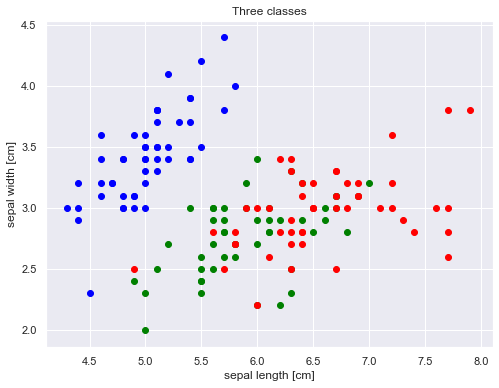

In [27]:
idx_setosa = np.where(y==0)
idx_versicolour = np.where(y==1)
idx_virginica = np.where(y==2)
X_setosa = X[idx_setosa]
X_versicolour = X[idx_versicolour]
X_virginica = X[idx_virginica]

X_sepal = X[:, :2]  # Only the first two features (used later)

plt.figure(figsize=(8, 6))
plt.title('Three classes')
plt.xlabel('sepal length [cm]')
plt.ylabel('sepal width [cm]')
plt.scatter(X_setosa[:, 0], X_setosa[:, 1], color='blue', label='setosa')
plt.scatter(X_versicolour[:, 0], X_versicolour[:, 1], color='green', label='versicolor')
plt.scatter(X_virginica[:, 0], X_virginica[:, 1], color='red', label='virginica')



In [28]:
# Test Setosa against combined Versicolour and Virginica!
y_set = y.copy()
y_set[idx_virginica] = 1


(4.111287886880543, 8.08871211311946) (1.8680761365693954, 4.531923863430605)


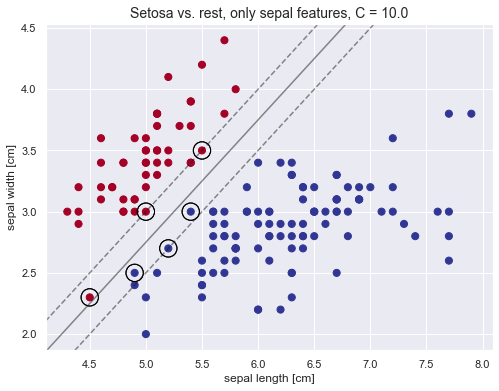

In [29]:
# Fit to only 2 Features:
C = 10
model = SVC(kernel='linear', C=C).fit(X_sepal, y_set)

plt.figure(figsize=(8, 6))
plt.title('Setosa vs. rest, only sepal features, C = {0:.1f}'.format(C), size=14)
plt.xlabel('sepal length [cm]')
plt.ylabel('sepal width [cm]')
plt.scatter(X_sepal[:, 0], X_sepal[:, 1], c=y_set, s=50, cmap='RdYlBu')
plot_svc_decision_function(model)
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, lw=1,
            facecolors='none', edgecolors='black')


In [30]:
# Fit to all 4 Features (no plotting):
X_train, X_test, y_train, y_test = train_test_split(X, y_set, test_size=0.2, random_state=42)
C = 10
model = SVC(kernel='linear', C=C).fit(X_train, y_train)
y_predict = model.predict(X_test)
print(f'\nTrain score: {model.score(X_train, y_train)*100:.3g}%')
print(f'Test  score: {model.score(X_test, y_test)*100:.3g}%')




Train score: 100%
Test  score: 100%


In [31]:
# Test Versicolour against combined Setosa and Virginica!
y_ver = y.copy()
y_ver[idx_virginica] = 0


(4.111287886880543, 8.08871211311946) (1.8680761365693954, 4.531923863430605)


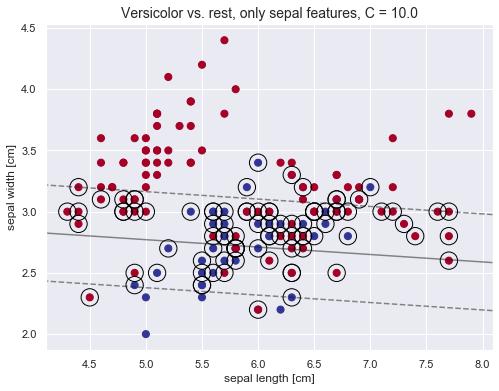

In [32]:
# Fit to only 2 Features:
C = 10
model = SVC(kernel='linear', C=C).fit(X_sepal, y_ver)

plt.figure(figsize=(8, 6))
plt.title('Versicolor vs. rest, only sepal features, C = {0:.1f}'.format(C), size=14)
plt.xlabel('sepal length [cm]')
plt.ylabel('sepal width [cm]')
plt.scatter(X_sepal[:, 0], X_sepal[:, 1], c=y_ver, s=50, cmap='RdYlBu')
plot_svc_decision_function(model)


In [33]:
# Fit to all 4 Features (no plotting):
X_train, X_test, y_train, y_test = train_test_split(X, y_ver, test_size=0.2, random_state=42)
C = 10
model = SVC(kernel='linear', C=C).fit(X_train, y_train)
y_predict = model.predict(X_test)
print(f'\nTrain score: {model.score(X_train, y_train)*100:.3g}%')
print(f'Test  score: {model.score(X_test, y_test)*100:.3g}%')




Train score: 75%
Test  score: 83.3%


In [34]:
# Test Virginica against combined Setosa and Versicolour!
y_vir = y.copy()
y_vir[idx_versicolour] = 0
y_vir[idx_virginica] = 1


(4.111287886880543, 8.08871211311946) (1.8680761365693954, 4.531923863430605)


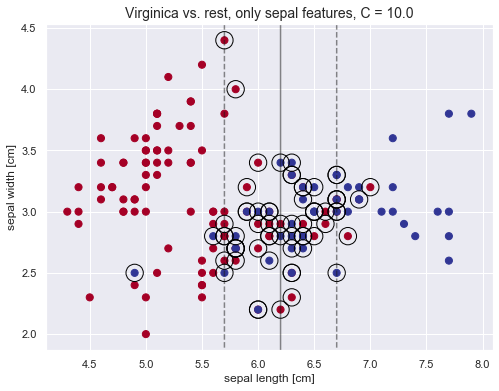

In [35]:
# Fit to only 2 Features:
C = 10
model = SVC(kernel='linear', C=C).fit(X_sepal, y_vir)

plt.figure(figsize=(8, 6))
plt.title('Virginica vs. rest, only sepal features, C = {0:.1f}'.format(C), size=14)
plt.xlabel('sepal length [cm]')
plt.ylabel('sepal width [cm]')
plt.scatter(X_sepal[:, 0], X_sepal[:, 1], c=y_vir, s=50, cmap='RdYlBu')
plot_svc_decision_function(model)


In [36]:
# Fit to all 4 Features (no plotting):
X_train, X_test, y_train, y_test = train_test_split(X, y_vir, test_size=0.2, random_state=42)
C = 10
model = SVC(kernel='linear', C=C).fit(X_train, y_train)
y_predict = model.predict(X_test)
print(f'\nTrain score: {model.score(X_train, y_train)*100:.3g}%')
print(f'Test  score: {model.score(X_test, y_test)*100:.3g}%')




Train score: 96.7%
Test  score: 96.7%


 # Two Moon example with GridSearchCV and SVC

In [37]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_moons


(-1.5022060588860096, 2.3650773975406536) (-1.1967064482150886, 1.71509374269226)


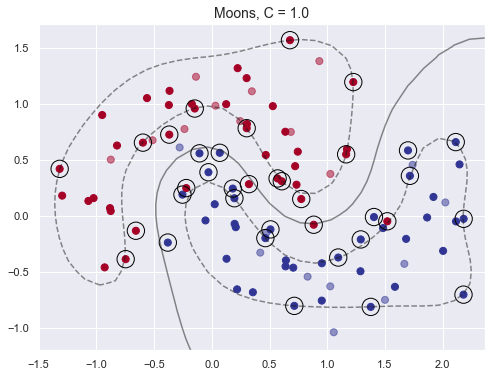

In [38]:


def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a two-dimensional SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    print(xlim, ylim)
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    xx, yy = np.meshgrid(x, y)
    xy = np.vstack([xx.ravel(), yy.ravel()]).T
    P = model.decision_function(xy).reshape(xx.shape)
    # plot decision boundary and margins
    ax.contour(xx, yy, P, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none', edgecolor='black')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)


X, y = make_moons(n_samples=100, noise=0.3, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

C = 1
model = SVC(kernel='rbf', C=C, gamma=2).fit(X_train, y_train)

plt.figure(figsize=(8, 6))
plt.title('Moons, C = {0:.1f}'.format(C), size=14)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, cmap='RdYlBu')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=50, cmap='RdYlBu', alpha=0.5)
plot_svc_decision_function(model)

In [39]:
y_predict = model.predict(X_test)
print(f'\nTrain score: {model.score(X_train, y_train)*100:.3g}%')
print(f'Test  score: {model.score(X_test, y_test)*100:.3g}%')



Train score: 95%
Test  score: 95%


In [40]:
param_grid = [
    {'C': [0.001, 0.01, 0.1, 10, 100, 1000],
    'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
    'kernel': ['rbf']},
    ]

clf = GridSearchCV(estimator=SVC(), param_grid=param_grid)
clf.fit(X_train, y_train)

df = pd.DataFrame(clf.cv_results_)
print(f'clf.best_score_: {clf.best_score_}')
print(f'clf.best_params_: {clf.best_params_}')
print(f'clf.refit_time_: {clf.refit_time_}')

model = clf.best_estimator_
y_predict = model.predict(X_test)
print(f'\nTrain score: {model.score(X_train, y_train)*100:.3g}%')
print(f'Test  score: {model.score(X_test, y_test)*100:.3g}%')


clf.best_score_: 0.9625
clf.best_params_: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
clf.refit_time_: 0.0

Train score: 96.2%
Test  score: 95%


(-1.5022060588860096, 2.3650773975406536) (-1.1967064482150886, 1.71509374269226)


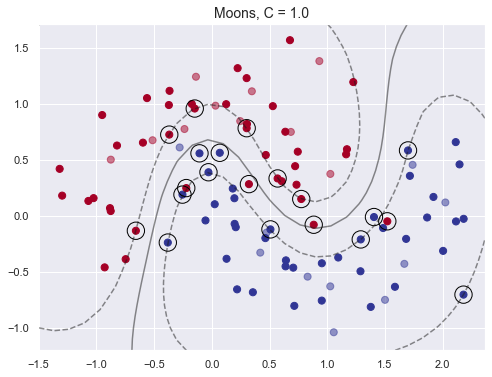

In [41]:
plt.figure(figsize=(8, 6))
plt.title('Moons, C = {0:.1f}'.format(C), size=14)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, cmap='RdYlBu')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=50, cmap='RdYlBu', alpha=0.5)
plot_svc_decision_function(model);


In [42]:
df


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001200,9.791215e-04,0.000599,0.000489,0.001,0.001,rbf,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}",0.7500,0.7500,0.8125,0.7500,0.8125,0.7750,0.030619,21
1,0.000600,4.896678e-04,0.000400,0.000490,0.001,0.01,rbf,"{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}",0.7500,0.7500,0.8125,0.7500,0.8125,0.7750,0.030619,21
2,0.001799,2.133720e-03,0.000800,0.000748,0.001,0.1,rbf,"{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}",0.7500,0.7500,0.8125,0.7500,0.7500,0.7625,0.025000,27
3,0.000999,1.095105e-03,0.000200,0.000400,0.001,1,rbf,"{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}",0.8125,0.8750,0.8750,0.8750,0.8125,0.8500,0.030619,12
4,0.000400,4.899208e-04,0.000400,0.000489,0.001,10,rbf,"{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}",0.9375,0.9375,0.9375,0.9375,0.8750,0.9250,0.025000,4
5,0.000600,4.896290e-04,0.000599,0.000489,0.001,100,rbf,"{'C': 0.001, 'gamma': 100, 'kernel': 'rbf'}",0.5000,0.6250,0.6250,0.8125,0.5625,0.6250,0.104583,34
6,0.000600,4.895899e-04,0.000400,0.000490,0.01,0.001,rbf,"{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}",0.7500,0.7500,0.8125,0.7500,0.8125,0.7750,0.030619,21
7,0.000799,3.995661e-04,0.000400,0.000800,0.01,0.01,rbf,"{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}",0.7500,0.7500,0.8125,0.7500,0.8125,0.7750,0.030619,21
8,0.000600,4.895121e-04,0.000400,0.000490,0.01,0.1,rbf,"{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}",0.7500,0.7500,0.8125,0.7500,0.7500,0.7625,0.025000,27
9,0.000600,4.895510e-04,0.000200,0.000400,0.01,1,rbf,"{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}",0.8125,0.8750,0.8750,0.8750,0.8125,0.8500,0.030619,12
